In [1]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import urllib.request, time, os

In [2]:
def ts(x):
    time.sleep(x)

## 1. 

In [3]:
# //*[@id="query"]
# //*[@id="place-main-section-root"]/section/div/div[6]/a

In [4]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())); ts(2)
driver.get('https://www.naver.com'); ts(2)

driver.find_element(By.ID, 'query').send_keys('관악구 돈가스' + '\n'); ts(3)

driver.find_element(By.XPATH, '//*[@id="place-main-section-root"]/section/div/div[6]/a').click()

driver.switch_to.window(driver.window_handles[1])

# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe')

# iframe 안쪽을 한번 클릭하기
driver.find_element(By.ID, '_pcmap_list_scroll_container').click()

# 로딩된 데이터 개수 확인
res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
before_len = len(res)

# 페이지 아래로 내리기
while True:
    # 맨 아래로 스크롤 내린다.
    driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.END)

    # 스크롤 사이 페이지 로딩 시간
    ts(1.5)

    # 스크롤 후 로딩된 데이터 개수 확인
    res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
    after_len = len(res)

    # 로딩된 데이터 개수가 같다면 반복 멈춤
    if before_len == after_len:
        break
    before_len = after_len

# 첫 번째 음식점부터 클릭
driver.find_element(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li:nth-child(1)').click()
ts(1)

soup = bs(driver.page_source, 'html.parser')

res_name = driver.find_element(By.XPATH, '//*[@id="_title"]/span[1]').text
res_cate = driver.find_element(By.XPATH, '//*[@id="_title"]/span[2]').text
res_score = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[1]/em').text
res_review_cnt = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[2]/a/em').text
res_blog_cnt = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[3]/a/em').text
res_address = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[1]/div/a/span[1]').text
res_facility = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[7]/div/div[2]/div/div/div[6]/div').text
res_broad = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[7]/div/div[2]/div/div/div[7]/div/a/div[1]/div/span[1]').text
res_info = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[7]/div/div[2]/div/div/div[9]/div/a/span[1]').text





# //*[@id="_title"]/span[1]

# #app-root > div > div > div



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="_title"]/span[1]"}
  (Session info: chrome=115.0.5790.171); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00E52B63+47795]
	(No symbol) [0x00DE67E1]
	(No symbol) [0x00CEC7ED]
	(No symbol) [0x00D19AC8]
	(No symbol) [0x00D19B8B]
	(No symbol) [0x00D48A82]
	(No symbol) [0x00D34D14]
	(No symbol) [0x00D471DA]
	(No symbol) [0x00D34AC6]
	(No symbol) [0x00D113D7]
	(No symbol) [0x00D1255D]
	GetHandleVerifier [0x010A6F89+2490073]
	GetHandleVerifier [0x010EC361+2773681]
	GetHandleVerifier [0x010E6211+2748769]
	GetHandleVerifier [0x00ED16B0+566784]
	(No symbol) [0x00DF019A]
	(No symbol) [0x00DEC418]
	(No symbol) [0x00DEC4FB]
	(No symbol) [0x00DDF317]
	BaseThreadInitThunk [0x75D000C9+25]
	RtlGetAppContainerNamedObjectPath [0x77EA7B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77EA7AEE+238]


In [ ]:
# #_pcmap_list_scroll_container > ul > li:nth-child(1)
# #_pcmap_list_scroll_container > ul > li:nth-child(50)

# #_pcmap_list_scroll_container > ul > li:nth-child(50)

<html lang="ko"><head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-180.png" re
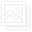
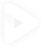
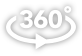
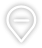

In [5]:
soup

In [5]:
after_len

50

In [5]:
driver.window_handles

['82FCFEFD43638380FCBB4011D298D985', 'DE5E1DAC4932DA21BBA20C8351C26695']

In [ ]:
driver.switch_to.frame()

In [7]:
driver.close()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=115.0.5790.171)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00E52B63+47795]
	(No symbol) [0x00DE67E1]
	(No symbol) [0x00CEC7ED]
	(No symbol) [0x00CD3495]
	(No symbol) [0x00D3893B]
	(No symbol) [0x00D3CED4]
	(No symbol) [0x00D34C93]
	(No symbol) [0x00D113D7]
	(No symbol) [0x00D1255D]
	GetHandleVerifier [0x010A6F89+2490073]
	GetHandleVerifier [0x010EC361+2773681]
	GetHandleVerifier [0x010E6211+2748769]
	GetHandleVerifier [0x00ED16B0+566784]
	(No symbol) [0x00DF019A]
	(No symbol) [0x00DEC418]
	(No symbol) [0x00DEC4FB]
	(No symbol) [0x00DDF317]
	BaseThreadInitThunk [0x75D000C9+25]
	RtlGetAppContainerNamedObjectPath [0x77EA7B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77EA7AEE+238]


In [9]:
driver.close()
driver.switch_to.window(driver.window_handles[0])
driver.close()